In [1]:
#import required libraries
import tensorflow
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2022-12-26 16:57:20.891158: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-26 16:57:21.634418: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-26 16:57:21.634476: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-26 16:57:23.602846: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
# train data augmentation
train_gen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,
                             horizontal_flip=True,validation_split=0.15)


In [3]:
train_data=train_gen.flow_from_directory('/home/ubuntu/Desktop/train_data_facesagain/train',
                                          target_size=(224,224),batch_size=32,
                                         class_mode="categorical",subset="training")
train_data.class_indices


Found 3391 images belonging to 8 classes.


{'feraz images': 0,
 'ganesh images': 1,
 'lakshmee images': 2,
 'pooja images': 3,
 'roshan images': 4,
 'sathish images': 5,
 'shrikant images': 6,
 'shruthi images': 7}

In [4]:
# augmentation for validation data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

validation_data=train_gen.flow_from_directory('/home/ubuntu/Desktop/train_data_facesagain/train',
                                          target_size=(224,224),batch_size=32,
                                              class_mode="categorical",subset="validation")


Found 595 images belonging to 8 classes.


In [5]:
test_gen=ImageDataGenerator(rescale=1./255)

test_data=test_gen.flow_from_directory('/home/ubuntu/Desktop/train_data_facesagain/test',
                                       target_size=(224,224),
                                       batch_size=32,class_mode="categorical",shuffle=True)

Found 137 images belonging to 8 classes.


In [6]:
test_data.class_indices

{'feraz mages': 0,
 'ganesh images': 1,
 'lakshmee images': 2,
 'pooja images': 3,
 'roshan images': 4,
 'sathish images': 5,
 'shrikant images': 6,
 'shruthi images': 7}

In [7]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization

In [8]:
# built architecture
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,activation="relu",padding="same",input_shape=[224,224,3]))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2))

model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=32,activation="relu"))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(units=16,activation="relu"))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(units=8,activation="softmax"))

2022-12-26 16:57:26.516098: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-26 16:57:26.516597: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-26 16:57:26.516646: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu-Zako): /proc/driver/nvidia/version does not exist
2022-12-26 16:57:26.518043: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 32)       128       
 ormalization)                                                   
                                                        

In [10]:
# compile the model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [11]:
#import callback for avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping

es=EarlyStopping(monitor="accuracy",patience=3)

In [12]:
#fit the model
model.fit(train_data,validation_data=validation_data,callbacks=[es],epochs=10)

Epoch 1/10


2022-12-26 16:57:29.395262: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 205520896 exceeds 10% of free system memory.
2022-12-26 16:57:30.396800: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 102760448 exceeds 10% of free system memory.
2022-12-26 16:57:30.396900: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 205520896 exceeds 10% of free system memory.


  1/106 [..............................] - ETA: 5:58 - loss: 2.4315 - accuracy: 0.1875

2022-12-26 16:57:30.848256: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 205520896 exceeds 10% of free system memory.
2022-12-26 16:57:31.689282: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 102760448 exceeds 10% of free system memory.


106/106 [==============================] - 164s 2s/step - loss: 1.6940 - accuracy: 0.4238 - val_loss: 1.9993 - val_accuracy: 0.1983
Epoch 2/10
106/106 [==============================] - 165s 2s/step - loss: 1.0874 - accuracy: 0.6709 - val_loss: 1.5983 - val_accuracy: 0.5361
Epoch 3/10
106/106 [==============================] - 167s 2s/step - loss: 0.7918 - accuracy: 0.7874 - val_loss: 0.9965 - val_accuracy: 0.8353
Epoch 4/10
106/106 [==============================] - 165s 2s/step - loss: 0.5963 - accuracy: 0.8487 - val_loss: 0.6545 - val_accuracy: 0.8655
Epoch 5/10
106/106 [==============================] - 164s 2s/step - loss: 0.4871 - accuracy: 0.8773 - val_loss: 0.2254 - val_accuracy: 0.9714
Epoch 6/10
106/106 [==============================] - 164s 2s/step - loss: 0.4366 - accuracy: 0.8832 - val_loss: 1.1333 - val_accuracy: 0.6319
Epoch 7/10
106/106 [==============================] - 162s 2s/step - loss: 0.5633 - accuracy: 0.8334 - val_loss: 0.3162 - val_accuracy: 0.9008
Epoch 8/10

In [13]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np

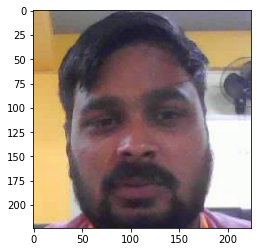

In [14]:
img=load_img('/home/ubuntu/Desktop/train_data_facesagain/test/feraz mages/feraz0.jpg',target_size=(224,224,3))
plt.imshow(img)

In [15]:
img=img_to_array(img)
img=np.expand_dims(img,axis=0)
img=img/255

In [16]:
np.round(model.predict(img))

1/1 [==============================] - 0s 129ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
# model.save('model.h5')

In [18]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model.h5)
# tflite_model = converter.convert()

# open('model.tflite' , "wb").write(tflite_model)